In [6]:
# @title <h1>Lab 2 : Risoluzione di sistemi lineari  </h1>
%%html
<marquee style='width: 50%; color: red;'><b>Questi esercizi possono essere chiesto all'esame!</b></marquee>

SyntaxError: invalid syntax (<ipython-input-6-4f853167c771>, line 3)

# **MATRICI e NORME**

---
Considera la matrice A
\begin{equation*}
A = 
\begin{pmatrix}
1 & 2  \\
0.499  & 1.001  
\end{pmatrix}
\end{equation*}

* Calcola la norma 1, la norma 2, la norma Frobenius e la norma infinito di A con ${\tt numpy.linalg.norm()}$ (guarda l'help della funzione).
* Calcola il numero di condizionamento di A con ${\tt numpy.linalg.cond()}$ (guarda l'help della funzione).
* Considera il vettore colonna $x = (1,1)^T$ e calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$.
* Considera ora il vettore ${\tilde b} = (3, 1.4985)^T$ e verifica che ${\tilde x} = (2, 0.5)^T$ è soluzione del sistema $A{\tilde x} = {\tilde b}$
* Calcola la norma 2 della perturbazione sui termini noti $ \Delta_b  = \| b - {\tilde b} \|_2$ e la norma 2 della perturbazione sulle soluzioni $ \Delta_x = \| x - {\tilde x} \|_2$. Confronta $\Delta_b$ con $\Delta_x$.


In [7]:
import numpy as np
import sys

# https://numpy.org/doc/stable/reference/

In [ ]:
help(np.linalg) # View source

# help (np.linalg.norm)
# help (np.linalg.cond)

In [9]:
A = np.array( [[1,2], [0.499, 1.001]])
print ('Norme di A:')

norm1 = np.linalg.norm(A, ord=1)
norm2 = np.linalg.norm(A, ord=2)
normfro = np.linalg.norm(A, ord='fro')
norminf = np.linalg.norm(A, ord=np.inf)

print ('Norma1 = ', norm1 , '\n')
print ('Norma2 = ', norm2 , '\n')
print ('Norma3 = ', normfro , '\n')
print ('Norma infinito = ', norminf , '\n')

cond1 = np.linalg.cond(A, p=1)
cond2 = np.linalg.cond(A, p=2)
condfro = np.linalg.cond(A, p='fro')
condinf = np.linalg.cond(A, p=np.inf)

print('K(A)_1 =', cond1, '\n')
print('K(A)_2 =', cond2, '\n')
print('K(A)_fro =', condfro, '\n')
print('K(A)_inf =', condinf, '\n')

# x = np.array([[1],[1]]);
x = np.ones((2, 1))
b = A.dot(x)
print(b, '\n')

btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2],[0.5]])
print ('A*xtilde = \n', A.dot(xtilde) , '\n')

deltax = np.linalg.norm(x-xtilde, ord=2)
deltab = np.linalg.norm(b-btilde, ord=2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Norma3 =  2.5002003919686118 

Norma infinito =  3.0 

K(A)_1 = 3001.0000000001082 

K(A)_2 = 2083.6668534103555 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

[[3. ]
 [1.5]] 

A*xtilde = 
 [[3.    ]
 [1.4985]] 

delta x =  1.118033988749895
delta b =  0.0015000000000000568


# **METODI DIRETTI**

---

La soluzione viene calcolata in un numero finito di passi, modificando la matrice del problema in modo da rendere piú agevole il calcolo della soluzione.

*   Con matrici triangolari: metodi di sostituzione;
*   Con qualsiasi matrice: metodo di eliminazione di Gauss;
*   Con matrici simmetriche: metodo di Cholesky.


# Esercizio 1

Considera la matrice
\begin{equation*}
A = 
\begin{pmatrix}
2 & -1 & 1 & -2 \\
0 & 2  & 0 & -1 \\
1 & 0  &-2 &  1 \\
0 & 2  & 1 &  1  
\end{pmatrix}
\end{equation*}

1. Crea il problema test in cui il vettore della soluzione esatta è $ x = (1, 1, 1, 1)^T$ e il vettore termine noto è $b = Ax$.
2. Guarda l'help del modulo ${\tt scipy.linalg.decomp\_lu}$ e usa una delle sue funzioni per calcolare la fattorizzazione LU di A con pivolting. Verifica la correttezza dell'output.
3. Risolvi il sistema lineare con la funzione ${\tt lu\_solve}$ del modulo decomp_lu oppure con ${\tt scipy.linalg.solve\_triangular}$.
4. Visualizza la soluzione calcolata e valutane la correttezza.



In [ ]:
#this only affects numpy arrays, not scalars
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})  # oppure np.set_printoptions(precision=4)

In [ ]:
# 1. creazione del problema test

A = np.array ([ [2,-1, 1,-2], [0, 2, 0, -1], [1, 0, -2, 1], [0, 2, 1, 1]  ], dtype=np.float)

print (A)

cond1 = np.linalg.cond(A, p=1)
cond2 = np.linalg.cond(A, p=2)
condfro = np.linalg.cond(A, p='fro')
condinf = np.linalg.cond(A, p=np.inf)

print('K(A)_1 =', cond1, '\n')
print('K(A)_2 =', cond2, '\n')
print('K(A)_fro =', condfro, '\n')
print('K(A)_inf =', condinf, '\n')

n = 4

x = np.ones((4,1))
b = A.dot(x)

print(b)


[[2.00 -1.00 1.00 -2.00]
 [0.00 2.00 0.00 -1.00]
 [1.00 0.00 -2.00 1.00]
 [0.00 2.00 1.00 1.00]]
K(A)_1 = 5.517241379310345 

K(A)_2 = 2.5548887723918345 

K(A)_fro = 5.118338018008131 

K(A)_inf = 6.206896551724137 

[[0.00]
 [1.00]
 [0.00]
 [4.00]]


In [10]:
import scipy
# help (scipy)

# DESCRIPTION
#    SciPy: A scientific computing package for Python
#    Documentation is available in the docstrings and online at https://docs.scipy.org.
# https://docs.scipy.org/doc/scipy/reference/

In [11]:
import scipy.linalg
# help (scipy.linalg)
import scipy.linalg.decomp_lu as LUdec # è un module, con ['lu', 'lu_solve', 'lu_factor']
# help (LUdec)

In [ ]:
# 2. fattorizzazione lu

lu, piv = LUdec.lu_factor(A)
print(lu)
print(piv)

[[ 2.   -1.    1.   -2.  ]
 [ 0.    2.    0.   -1.  ]
 [ 0.5   0.25 -2.5   2.25]
 [ 0.    1.   -0.4   2.9 ]]
[0 1 2 3]


In [ ]:
 # 3. risoluzione
# Ax = b   <--->  PLUx = b  <--->  LUx = Pb  <--->  Ly=Pb & Ux=y

my_x = LUdec.lu_solve((lu,piv),b)
print(my_x)

[[1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# 4. verifica 
print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.15e' %my_x[i])

print ('%0.15e' %np.linalg.norm(x-my_x, 2))


Soluzione calcolata: 
1.000000000000000e+00
1.000000000000000e+00
1.000000000000000e+00
1.000000000000000e+00
0.000000000000000e+00


In [ ]:
# IMPLEMENTAZIONE ALTERNATIVA 

# fattorizzazione
P,L,U = LUdec.lu(A)

# risoluzione di    Ax = b   <--->  PLUx = b  <--->  PLy=b & Ux=y  <--->  Ly=Pb & Ux=y
y = scipy.linalg.solve_triangular(np.matmul(P,L),b)
my_x = scipy.linalg.solve_triangular(U,y)

# verifica
print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.2f' %my_x[i])

[[1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00]
 [0.50 0.25 1.00 0.00]
 [0.00 1.00 -0.40 1.00]]

Soluzione calcolata: 
1.35
1.19
1.24
1.38


# Esercizio 2

Ripeti l'esercizio 1 sulla matrice di Hilbert, creata con ${\tt A = scipy.linalg.hilbert(5)}$. In particolare:
* calcola il numero di condizionamento di A;
* guarda alla matrice di permutazione.

In [ ]:
# IMPLEMENTAZIONE ALTERNATIVA 
A = scipy.linalg.hilbert(5)
cond1 = np.linalg.cond(A, p=1)
cond2 = np.linalg.cond(A, p=2)
condfro = np.linalg.cond(A, p='fro')
condinf = np.linalg.cond(A, p=np.inf)

print('K(A)_1 =', cond1, '\n')
print('K(A)_2 =', cond2, '\n')
print('K(A)_fro =', condfro, '\n')
print('K(A)_inf =', condinf, '\n')

n = 5

x = np.ones((n,1))
b = A.dot(x)

# fattorizzazione
# P,L,U = LUdec.lu(A) boh non va
lu, piv = LUdec.lu_factor(A)

# Ax = b   <--->  PLUx = b  <--->  LUx = Pb  <--->  Ly=Pb & Ux=y
my_x = LUdec.lu_solve((lu,piv),b)

# verifica
print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.2f' %my_x[i])

print('%0.15f' %np.linalg.norm(x-my_x, 2))

K(A)_1 = 943656.0000063396 

K(A)_2 = 476607.25024259434 

K(A)_fro = 480849.11699795065 

K(A)_inf = 943656.0000063627 


Soluzione calcolata: 
1.00
1.00
1.00
1.00
1.00
0.000000000003763


# Esercizio 3
Scrivi le due funzioni ${\tt LTrisol()}$ e ${\tt UTrisol()}$ per implementare i metodi di sostituzione all'avanti e all'indietro, poi:
* usa la fattorizzazione ${\tt P, L, U = LUdec.lu(A) }$ sulla matrice degli esercizi precedenti;
* risolvi i sistemi triangolari usando la tue funzioni.



In [14]:
def LTrisol(L,b):
  n=b.size
  x=np.zeros(n)
  x[0]=  b[0]/L[0,0];
  for i in range(1,n):
    x[i]=(b[i]-np.dot(L[i,0:i],x[0:i]))/L[i,i];
  return x

def UTrisol(U,b):
  n=b.size
  x=np.zeros(n)
  x[n-1]=  b[n-1]/U[n-1,n-1];
  for i in range(n-1,-1,-1):
    x[i]=(b[i]-np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i];
  return x

A = np.array ([ [2,-1, 1,-2], [0, 2, 0, -1], [1, 0, -2, 1], [0, 2, 1, 1]  ], dtype=np.float)
n = np.shape(A)[0]
x = np.ones((4,1))
b = A.dot(x)

P,L,U = LUdec.lu(A)


# Ax = b   <--->  PLUx = b  <--->  LUx = Pb  <--->  Ly=Pb & Ux=y
y = LTrisol(L, P.dot(b))
my_x = UTrisol(U,y)

print('\nSoluzione calcolata:' )
for i in range(n):
    print('%0.2f' %my_x[i])

print("error is: ",'%0.15f' %np.linalg.norm(x-my_x, 2))


Soluzione calcolata:
1.00
1.00
1.00
1.00
error is:  0.000000000000000


# Esercizio 4

Comprendere i seguenti codici che implementano la fattorizzazione LU senza pivoting e la fattorizzazione LL di Cholesky.

In [ ]:
# LU senza pivoting

def LU_fact_NOpiv(A):
  a = np.copy(A)
  n=a.shape[1]
  
  for k in range(n-1):
    if a[k, k] != 0:
      a[k+1:, k] = a[k+1:, k]/a[k,k]
      
      a1 = np.expand_dims(a[k+1:, k], 1)
      a2 = np.expand_dims(a[k, k+1:], 0)
      a[k+1:, k+1:] = a[k+1:, k+1:] - (a1 * a2)
  return a

In [ ]:
# Cholesky

def cholesky(A):
  
  n=A.shape[1]
  L=np.zeros((n,n))

  for j in range(0 ,n):
    for i in range(0,j):
      L[j,i]=(A[i,j]-np.dot(L[i,0:i].T,L[j,0:i]))/L[i,i]
      
    if ((A[j,j]-np.dot(L[0:j,j].T,L[0:j,j]))>0):
        L[j,j]=np.sqrt(A[j,j]-np.dot(L[j,0:j].T,L[j,0:j]))
         
    else:
        return ('A non è definita positiva')
  
  return L

# Esercizio 5
Calcola la fattorizzazione di Choleski sulla matrice A generata come

${\tt A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)}$
${\tt A = np.matmul( A, np.transpose(A) )}$

usando la funzione ${\tt np.linalg.cholesky}$ o quella dell'esercizio precedente.
* Verifica la correttezza della fattorizzazione.
* Risolvi il sistema lineare Ax = b dove ${\tt x = (1, 1, 1, 1)^T}$ . 

In [ ]:
help (np.linalg.cholesky)

In [20]:
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=np.float)
A = np.matmul( A, np.transpose(A) )
print(A, "\n")
#matrice generata simmetrica definita positiva

#controllo correttezza
L = np.linalg.cholesky(A)
print(L, "\n")
A2 = np.dot(L,np.transpose(L))
print(A2, "\n")

#Risolvo sistema lineare
x = np.ones((4,1))
b = np.dot(A,x)
print(b)

#Ax=B  <=> LL^t x = b <=> Ly=b & y=L^t*x  <=> L^t * x = y
y = LTrisol(L, b);
my_x = UTrisol(L.T, y);

print('\nSoluzione calcolata:' )
for i in range(n):
    print('%0.15f' %my_x[i])

print("error is: ",'%0.15e' %np.linalg.norm(x-my_x, 2))

[[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]] 

[[ 3.87298335  0.          0.          0.        ]
 [ 1.29099445  5.32290647  0.          0.        ]
 [-1.54919334 -6.38748777  2.79284801  0.        ]
 [-0.77459667  1.69080559  1.28900677  0.93789019]] 

[[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]] 

[[11.]
 [ 7.]
 [ 3.]
 [ 5.]]

Soluzione calcolata:
1.000000000000001
0.999999999999998
0.999999999999999
1.000000000000002
error is:  6.742262948251187e-15


# **METODI INDIRETTI**

---

Calcolo di una soluzione come limite di una successione di approssimazioni $x_k$, senza modificare la struttura della matrice A. Sono metodi adatti per sistemi di grandi dimensioni con matrici sparse (pochi elementi non nulli).
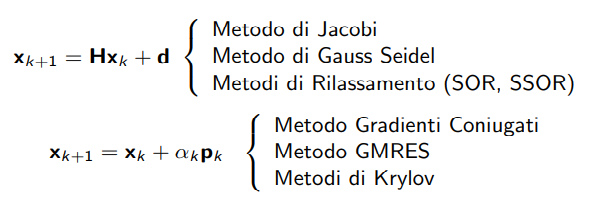

# Esercizio 6

Scrivi le funzioni 
${\tt Jacobi(A,b,x0,maxit,tol, xTrue)}$ e ${\tt GaussSeidel(A,b,x0,maxit,tol, xTrue)}$
per implementare i metodi di Jacobi e di Gauss Seidel per la risoluzione di sistemi lineari con matrice a diagonale dominante. In particolare:
* ${\tt x0}$ sia l'iterato iniziale;
* la condizione d'arresto sia dettata dal numero massimo di iterazioni consentite ${\tt maxit}$ e dalla tolleranza ${\tt tol}$ sulla differenza relativa fra due iterati successivi;
* si preveda in input la soluzione esatta ${\tt xTrue}$ per calcolare l'errore relativo ad ogni iterazione.

Entrambe le funzioni restituiscano in output:
* la soluzione ${\tt x}$;
* il numero ${\tt k}$ di iterazioni effettuate;
* il vettore ${\tt relErr}$ di tutti gli errori relativi.


In [29]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x= np.copy(x0)
  norma_it=1+tol
  relErr=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)
  while (ite<maxit-1 and norma_it>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x_old[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i]  
    ite=ite+1
    norma_it=np.linalg.norm(x-x_old)/np.linalg.norm(x)
    relErr[ite]=np.linalg.norm(xTrue-x)
  relErr=relErr[:ite]  
  return [x, ite, relErr]

In [30]:
def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x= np.copy(x0)
  norma_it=1+tol
  relErr=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)
  while (ite<maxit-1 and norma_it>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i]  
    ite=ite+1
    norma_it=np.linalg.norm(x-x_old)/np.linalg.norm(x)
    relErr[ite]=np.linalg.norm(xTrue-x)
  relErr=relErr[:ite]  
  return [x, ite, relErr]

#Esercizio 7
Testa le due funzioni dell'esercizio precedente per risolvere il sistema lineare Ax = b dove A è la matrice 10x10
\begin{equation*}
A = 
\begin{pmatrix}
5 & 1 & 0 & 0 & ... & 0 \\
1 & 5 & 1 & 0 & ... & 0 \\
0 & 1 & \ddots & \ddots & \vdots & \vdots \\
0 & 0 & \ddots & 5 & 1 & 0 \\
0 & 0 & ... & 1 &  5  & 1 \\
0 & 0 & ... & 0 &  1  & 5 \\
\end{pmatrix}
\end{equation*}
e ${\tt x = (1, 1, ..., 1)^T}$ la soluzione esatta.

Confronta i due metodi e grafica in un unico plot i due vettori ${\tt relErr}$.


In [47]:
n = 10

#help (np.eye)
#help (np.diag)
A = 5*np.eye(n)+np.diag(np.ones(n-1), 1)+np.diag(np.ones(n-1), -1)
print(A, "\n")

xTrue = np.ones((n,1))
b = np.dot(A,xTrue)
print(b, "\n")

import random
x0 = np.random.rand(10,1)
it = 300
tol = 0.000000000001

(xJacobi, kJacobi, relErrJacobi) = Jacobi(A,b,x0,it,tol,xTrue) 
(xGS, kGS, relErrGS) = GaussSeidel(A,b,x0,it,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])

print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])

[[5. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 5. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 5. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 5. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 5. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 5. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 5. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 5. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 5. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]] 

[[6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [6.]] 


Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


Err Jacobi:  [[2.06284665e+00]
 [7.20595432e-01]
 [2.68683115e-01]
 [1.01801410e-01]
 [3.87903630e-02]
 [1.48191238e-02]
 [5.66951977e-03]
 [2.17099495e-03]
 [8.31824232e-04]
 [3.18850555e-04]
 [1.22257514e-04]
 [4.68880809e-05]
 [1.79855397e-05]
 [6.89986738e-06]
 [2.64728640e-06]
 [1.01576668e-06]
 [3.89773393e-07]
 [1.49571812e-07]
 [5.73987159e-08]
 [2.20275410e-08]
 [8.45354022e-09]
 [3.24427741e-09]
 [1.24509492e-09]
 [4.77849369e-10]
 [1.83392879e-10]
 [7.03844745e-11]
 [2.70128541e-11]
 [1.03673161e-11]
 [3.97889199e-12]
 [1.52696433e-12]] 
Err GS:  [[2.06284665e+00]
 [3.67231720e-01]
 [6.86797804e-02]
 [1.32535899e-02]
 [2.76825839e-03]
 [5.52506966e-04]
 [1.16736102e-04]
 [2.03947399e-05]
 [3.99133905e-06]
 [5.64415483e-07]
 [1.17996207e-07]
 [2.75573422e-08]
 [5.59882095e-09]
 [1.02293592e-09]
 [1.74700033e-10]
 [2.85609300e-11]
 [4.53453958e-12]
 [7.05680619e-13]]


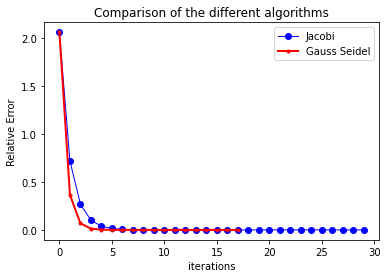

In [48]:
# CONFRONTI

print ("Err Jacobi: ", relErrJacobi, "\nErr GS: ", relErrGS)

# Confronto grafico degli errori di Errore Relativo

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

rangeJabobi = range (0, kJacobi)
rangeGS = range(0, kGS)

ax.plot(rangeJabobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='o'  )
ax.plot(rangeGS, relErrGS, label='Gauss Seidel', color = 'red', linewidth=2, marker='.' )
legend = ax.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('Relative Error')
plt.title('Comparison of the different algorithms')
plt.show()

